In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#1. To apply unsupervised dimensionality reduction technique, namely principal component analysis (PCA), to visualize high dimensional data. 
#2. To classify samples using linear discriminant analysis (LDA) and multi-layer perceptron  (MLP) classifier, and evaluate the classification performances. 

In [3]:
hdata = pd.read_csv('housing_classes_train.csv')
hdata

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PriceBand
0,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875,Expensive
1,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715,Expensive
2,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917,MidRange
3,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197,MidRange
4,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140,Affordable
...,...,...,...,...,...,...,...,...,...,...
16507,3.6389,36.0,5.584615,1.115385,490.0,3.769231,33.91,-118.10,1.676,MidRange
16508,4.5391,14.0,6.016688,1.017972,2436.0,3.127086,33.37,-117.24,1.809,MidRange
16509,5.6306,5.0,5.958393,1.031564,2435.0,3.493544,37.33,-121.76,2.862,Expensive
16510,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.78,-122.44,4.125,Expensive


In [4]:
print(hdata.shape)
hdata.describe()

(16512, 10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.870716,28.570918,5.422508,1.096515,1434.115734,3.064722,35.627757,-119.566976,2.069687
std,1.900132,12.582281,2.520931,0.491311,1130.309986,10.624706,2.134543,2.000519,1.154148
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.430476,1.005825,789.000000,2.429013,33.930000,-121.800000,1.194000
50%,3.529400,29.000000,5.227170,1.048765,1170.000000,2.816122,34.250000,-118.490000,1.804000
75%,4.750375,37.000000,6.051005,1.099493,1735.000000,3.278954,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,28566.000000,1243.333333,41.950000,-114.310000,5.000010


# TASK-A-PCA
#A.1 standarizing the training dataset, removing outliers using 3sd. 

In [5]:
df1 = hdata[hdata.MedInc<=(hdata.MedInc.mean()+3*hdata.MedInc.std())]
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PriceBand
0,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875,Expensive
1,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715,Expensive
2,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917,MidRange
3,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197,MidRange
4,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140,Affordable
...,...,...,...,...,...,...,...,...,...,...
16507,3.6389,36.0,5.584615,1.115385,490.0,3.769231,33.91,-118.10,1.676,MidRange
16508,4.5391,14.0,6.016688,1.017972,2436.0,3.127086,33.37,-117.24,1.809,MidRange
16509,5.6306,5.0,5.958393,1.031564,2435.0,3.493544,37.33,-121.76,2.862,Expensive
16510,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.78,-122.44,4.125,Expensive


In [6]:
df2=df1[df1.AveRooms<=(df1.AveRooms.mean()+3*df1.AveRooms.std())]
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PriceBand
0,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875,Expensive
1,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715,Expensive
2,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917,MidRange
3,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197,MidRange
4,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140,Affordable
...,...,...,...,...,...,...,...,...,...,...
16507,3.6389,36.0,5.584615,1.115385,490.0,3.769231,33.91,-118.10,1.676,MidRange
16508,4.5391,14.0,6.016688,1.017972,2436.0,3.127086,33.37,-117.24,1.809,MidRange
16509,5.6306,5.0,5.958393,1.031564,2435.0,3.493544,37.33,-121.76,2.862,Expensive
16510,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.78,-122.44,4.125,Expensive


In [7]:
df3=df2[df2.AveBedrms<=(df2.AveBedrms.mean()+3*df2.AveBedrms.std())]
df3

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PriceBand
0,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875,Expensive
1,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715,Expensive
2,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917,MidRange
3,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197,MidRange
4,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140,Affordable
...,...,...,...,...,...,...,...,...,...,...
16507,3.6389,36.0,5.584615,1.115385,490.0,3.769231,33.91,-118.10,1.676,MidRange
16508,4.5391,14.0,6.016688,1.017972,2436.0,3.127086,33.37,-117.24,1.809,MidRange
16509,5.6306,5.0,5.958393,1.031564,2435.0,3.493544,37.33,-121.76,2.862,Expensive
16510,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.78,-122.44,4.125,Expensive


In [8]:
df4=df3[df3.Population<=(df3.Population.mean()+3*df3.Population.std())]
df4

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PriceBand
0,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875,Expensive
1,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715,Expensive
2,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917,MidRange
3,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197,MidRange
4,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140,Affordable
...,...,...,...,...,...,...,...,...,...,...
16507,3.6389,36.0,5.584615,1.115385,490.0,3.769231,33.91,-118.10,1.676,MidRange
16508,4.5391,14.0,6.016688,1.017972,2436.0,3.127086,33.37,-117.24,1.809,MidRange
16509,5.6306,5.0,5.958393,1.031564,2435.0,3.493544,37.33,-121.76,2.862,Expensive
16510,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.78,-122.44,4.125,Expensive


In [9]:
df5=df4[df4.AveOccup<=(df4.AveOccup.mean()+3*df4.AveOccup.std())]
df5

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PriceBand
0,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875,Expensive
1,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715,Expensive
2,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917,MidRange
3,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197,MidRange
4,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140,Affordable
...,...,...,...,...,...,...,...,...,...,...
16507,3.6389,36.0,5.584615,1.115385,490.0,3.769231,33.91,-118.10,1.676,MidRange
16508,4.5391,14.0,6.016688,1.017972,2436.0,3.127086,33.37,-117.24,1.809,MidRange
16509,5.6306,5.0,5.958393,1.031564,2435.0,3.493544,37.33,-121.76,2.862,Expensive
16510,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.78,-122.44,4.125,Expensive


In [10]:
df5.PriceBand.unique()
df6 = df5.copy()
df6.PriceBand.replace(
    {
        'Expensive':1,
        'MidRange' :2,
        'Affordable':3
    },inplace=True)
df6.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PriceBand
0,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,2.875,1
1,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,2.715,1
2,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,1.917,2
3,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2.197,2
4,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,1.140,3


In [57]:
df7 = df6.drop(['MedHouseVal','PriceBand'],axis='columns')
print(df7.info())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dscaled = scaler.fit_transform(df7)
dscaled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15514 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15514 non-null  float64
 1   HouseAge    15514 non-null  float64
 2   AveRooms    15514 non-null  float64
 3   AveBedrms   15514 non-null  float64
 4   Population  15514 non-null  float64
 5   AveOccup    15514 non-null  float64
 6   Latitude    15514 non-null  float64
 7   Longitude   15514 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
None


array([[ 0.5105995 , -0.0829778 ,  0.88895866, ...,  0.23180838,
         1.2955122 , -1.37497965],
       [ 1.17520358, -0.88765193,  0.65624532, ...,  0.00680988,
        -0.64233965,  0.4973401 ],
       [-1.25385043,  1.44590303, -1.36241786, ...,  1.39821888,
        -0.73170661,  0.69310544],
       ...,
       [ 1.16986091, -1.93372829,  0.6621086 , ...,  0.81513169,
         0.80164219, -1.08886108],
       [ 0.07920944,  1.2045008 , -0.39702335, ..., -1.64470357,
         1.01330077, -1.43019552],
       [-0.76530616, -0.7267171 ,  0.25638524, ...,  0.91580193,
         0.27484751,  0.25639815]])

In [59]:
print(dscaled.shape)

(15514, 8)


In [13]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
d_pca = pca.fit_transform(dscaled)
d_pca.shape

(15514, 6)

In [14]:
pca = PCA(n_components=2)
n_pca = pca.fit_transform(dscaled)
print(n_pca.shape)
print('no of pc components:',pca.n_components_)
n_pca

(15514, 2)
no of pc components: 2


array([[ 2.06450526,  0.57653278],
       [-1.03720505,  1.8470624 ],
       [-1.59192626, -2.05994856],
       ...,
       [ 0.77052408,  1.8590677 ],
       [ 2.22967151, -0.95801218],
       [-0.22973488, -0.11598276]])

In [15]:
print('___________PCA_Summary_____________')
print('No of pc components:',pca.n_components_)
print('No of samples:', pca.n_samples_)
print('No of features:',pca.n_features_)
print('Percentage_variance_ratio_by_selected_components:',pca.explained_variance_ratio_)

___________PCA_Summary_____________
No of pc components: 2
No of samples: 15514
No of features: 8
Percentage_variance_ratio_by_selected_components: [0.26017503 0.22237186]


In [16]:
covpca = np.cov(n_pca.T)
covpca

array([[2.08153443e+00, 3.19046880e-16],
       [3.19046880e-16, 1.77908957e+00]])

In [17]:
from numpy.linalg import eig
Eval,Evec = eig(covpca)
print(Eval)
print(Evec)

[2.08153443 1.77908957]
[[ 1.00000000e+00 -1.05489273e-15]
 [ 0.00000000e+00  1.00000000e+00]]


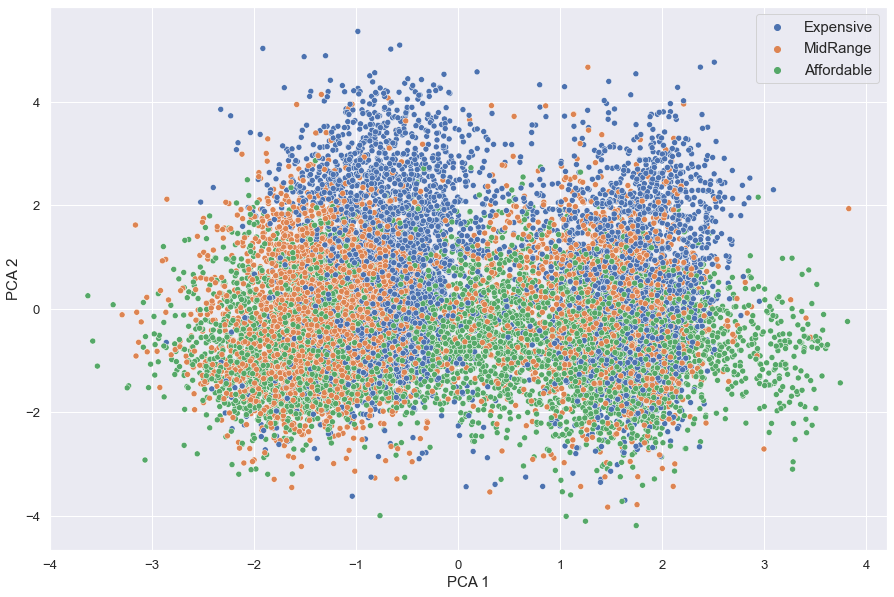

In [68]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=n_pca[:,0],y= n_pca[:,1],hue=df5.iloc[:,9])
plt.xlabel('PCA 1', fontsize=15)
plt.ylabel('PCA 2', fontsize=15)
plt.legend(fontsize=15)

In [49]:
#pip install bioinfokit
#from bioinfokit.visuz import cluster
#from bioinfokit.analys import get_data
#cluster.biplot(cscore=n_pca, loadings=loadings, labels=dscaled.columns.values, var1=round(n_pca.explained_variance_ratio_[0]*100, 2),
#    var2=round(n_pca.explained_variance_ratio_[1]*100, 2))

## Task B LDA/FDA

In [67]:
ldf = df6.drop(['MedHouseVal'],axis='columns')
ldf
#choose 1 to 8 feature as predictor and feature (10) as the target

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PriceBand
0,4.5694,28.0,6.219512,1.030488,504.0,3.073171,38.38,-122.33,1
1,5.6392,18.0,5.951644,1.034816,3010.0,2.911025,34.26,-118.60,1
2,1.7292,47.0,3.628032,1.032345,1452.0,3.913747,34.07,-118.21,2
3,4.6226,36.0,5.126238,0.985149,988.0,2.445545,33.96,-118.02,2
4,2.4375,49.0,4.024390,0.942073,1405.0,4.283537,34.08,-118.20,3
...,...,...,...,...,...,...,...,...,...
16507,3.6389,36.0,5.584615,1.115385,490.0,3.769231,33.91,-118.10,2
16508,4.5391,14.0,6.016688,1.017972,2436.0,3.127086,33.37,-117.24,2
16509,5.6306,5.0,5.958393,1.031564,2435.0,3.493544,37.33,-121.76,1
16510,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.78,-122.44,1


In [66]:
print(ldf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15514 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15514 non-null  float64
 1   HouseAge    15514 non-null  float64
 2   AveRooms    15514 non-null  float64
 3   AveBedrms   15514 non-null  float64
 4   Population  15514 non-null  float64
 5   AveOccup    15514 non-null  float64
 6   Latitude    15514 non-null  float64
 7   Longitude   15514 non-null  float64
 8   PriceBand   15514 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


In [21]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ldf_sc = scaler.fit_transform(ldf)
ldf_sc

array([[ 0.5105995 , -0.0829778 ,  0.88895866, ...,  1.2955122 ,
        -1.37497965, -1.23326471],
       [ 1.17520358, -0.88765193,  0.65624532, ..., -0.64233965,
         0.4973401 , -1.23326471],
       [-1.25385043,  1.44590303, -1.36241786, ..., -0.73170661,
         0.69310544, -0.00340878],
       ...,
       [ 1.16986091, -1.93372829,  0.6621086 , ...,  0.80164219,
        -1.08886108, -1.23326471],
       [ 0.07920944,  1.2045008 , -0.39702335, ...,  1.01330077,
        -1.43019552, -1.23326471],
       [-0.76530616, -0.7267171 ,  0.25638524, ...,  0.27484751,
         0.25639815,  1.22644715]])

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(dscaled,df5.iloc[:,9])

#results
print('-----------LDA_summary----------')
print('classes:', lda.classes_)
print('priors:', lda.priors_)
print('Percentage of variance explained by each of the selected components:',lda.explained_variance_ratio_)

-----------LDA_summary----------
classes: ['Affordable' 'Expensive' 'MidRange']
priors: [0.33195823 0.32918654 0.33885523]
Percentage of variance explained by each of the selected components: [0.95607669 0.04392331]


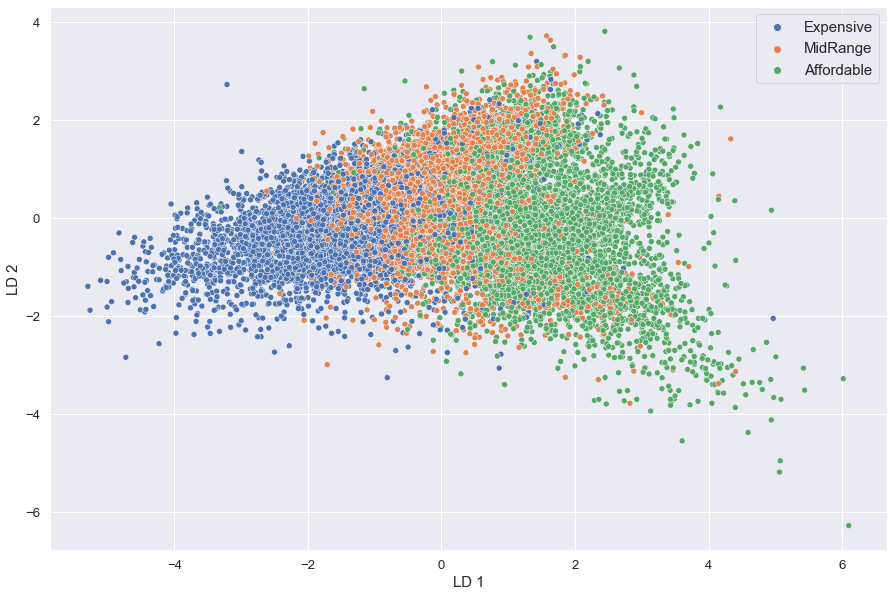

In [47]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_lda[:,0],y= x_lda[:,1],hue=df5.iloc[:,9])
plt.xlabel('LD 1', fontsize=15)
plt.ylabel('LD 2', fontsize=15)
plt.legend(fontsize=15)

In [24]:
Tdata = pd.read_csv('housing_classes_test.csv')
Tdata
#selecting 1 to 8 features and standardizing the test data
Tdf = Tdata.drop(['MedHouseVal','PriceBand'],axis='columns')
Tdf
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Test_df = scaler.fit_transform(Tdf)
Test_df

array([[-0.0415008 ,  0.88021498, -0.21742775, ..., -0.05163173,
         1.21023529, -1.51792729],
       [ 0.07964233, -1.58109414,  0.15351375, ..., -0.00161793,
         0.20626747,  0.26326855],
       [ 0.1146685 , -1.34290293, -0.0415416 , ...,  0.20191298,
        -1.30668868,  1.29030905],
       ...,
       [-1.14848565,  0.16564136, -0.07229513, ...,  0.06634842,
         1.0561379 , -0.84315672],
       [-0.63078312, -0.54893225, -0.6224378 , ..., -0.00988215,
        -0.69963838,  0.65026932],
       [ 0.87855494,  0.56262671, -0.17835605, ..., -0.08295002,
         0.81331778, -1.24504213]])

In [25]:
y_test=Tdata.iloc[:,9]
y_test.shape

(4128,)

In [26]:
#predicting
y_pred = lda.predict(Test_df)
y_pred

array(['MidRange', 'Affordable', 'MidRange', ..., 'Affordable',
       'MidRange', 'Expensive'], dtype='<U10')

In [27]:
x_test_lda_transform = lda.transform(Test_df)
x_test_lda_transform

array([[-0.48764017, -0.38776792],
       [ 1.0809719 , -0.0870531 ],
       [-0.23256436,  1.30041193],
       ...,
       [ 2.02714722, -0.62368658],
       [ 0.4945725 ,  0.86320746],
       [-1.80669134, -0.16196102]])

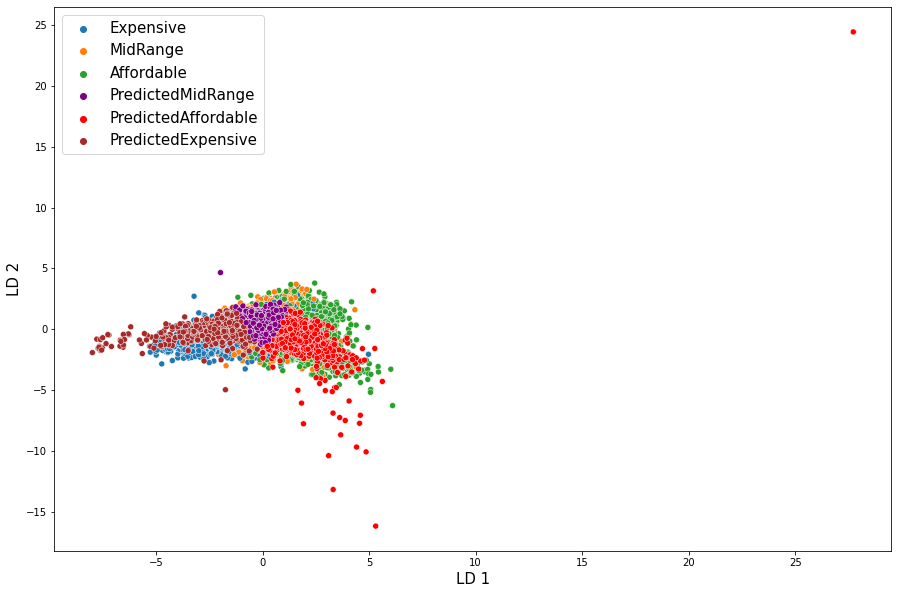

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=x_lda[:,0],y= x_lda[:,1],hue=df5.iloc[:,9])
sns.scatterplot(x=x_test_lda_transform[:,0],y=x_test_lda_transform[:,1],hue=['Predicted'+ s for s in y_pred],palette=['purple','red','brown'])
plt.xlabel('LD 1', fontsize=15)
plt.ylabel('LD 2', fontsize=15)
plt.legend(fontsize=15)

[[950   7 438]
 [ 22 924 413]
 [199 187 988]]


<function matplotlib.pyplot.show(close=None, block=None)>

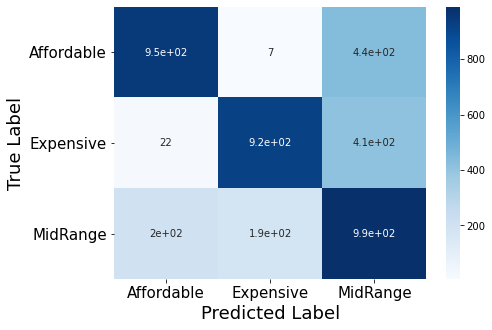

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test,y_pred))
cm= confusion_matrix(y_test,y_pred,labels=np.unique(df5.iloc[:,9]))
print(cm)

plt.subplots(figsize=(7,5))
res=sns.heatmap(cm,annot=True,cmap=plt.cm.Blues,xticklabels=np.unique(df5.iloc[:,9]),yticklabels=np.unique(df5.iloc[:,9]))
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=15, rotation=0)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=15, rotation=0)
res.set_ylabel('True Label',fontsize=18)
res.set_xlabel('Predicted Label', fontsize=18)
plt.show

In [30]:
#classifiaction report
print(classification_report(y_test,y_pred, labels=np.unique(df5.iloc[:,9])))

              precision    recall  f1-score   support

  Affordable       0.81      0.68      0.74      1395
   Expensive       0.83      0.68      0.75      1359
    MidRange       0.54      0.72      0.62      1374

    accuracy                           0.69      4128
   macro avg       0.72      0.69      0.70      4128
weighted avg       0.73      0.69      0.70      4128



# Task-C MLP

In [31]:
# feature from 1 to 8 and 10 as target. standardized
ldf_sc

array([[ 0.5105995 , -0.0829778 ,  0.88895866, ...,  1.2955122 ,
        -1.37497965, -1.23326471],
       [ 1.17520358, -0.88765193,  0.65624532, ..., -0.64233965,
         0.4973401 , -1.23326471],
       [-1.25385043,  1.44590303, -1.36241786, ..., -0.73170661,
         0.69310544, -0.00340878],
       ...,
       [ 1.16986091, -1.93372829,  0.6621086 , ...,  0.80164219,
        -1.08886108, -1.23326471],
       [ 0.07920944,  1.2045008 , -0.39702335, ...,  1.01330077,
        -1.43019552, -1.23326471],
       [-0.76530616, -0.7267171 ,  0.25638524, ...,  0.27484751,
         0.25639815,  1.22644715]])

In [32]:
from sklearn.neural_network import MLPClassifier
# initialize model and its parameters
mlp= MLPClassifier(early_stopping= True,verbose=True)
mlp.fit(dscaled,df5.iloc[:,9])

Iteration 1, loss = 0.92557521
Validation score: 0.664304
Iteration 2, loss = 0.74547744
Validation score: 0.715206
Iteration 3, loss = 0.67091519
Validation score: 0.736469
Iteration 4, loss = 0.63821380
Validation score: 0.741624
Iteration 5, loss = 0.62242127
Validation score: 0.748067
Iteration 6, loss = 0.61266425
Validation score: 0.745490
Iteration 7, loss = 0.60520112
Validation score: 0.751289
Iteration 8, loss = 0.60009040
Validation score: 0.756443
Iteration 9, loss = 0.59565067
Validation score: 0.756443
Iteration 10, loss = 0.59224342
Validation score: 0.755155
Iteration 11, loss = 0.58863483
Validation score: 0.755799
Iteration 12, loss = 0.58580326
Validation score: 0.758376
Iteration 13, loss = 0.58335996
Validation score: 0.762242
Iteration 14, loss = 0.58099936
Validation score: 0.755799
Iteration 15, loss = 0.57935927
Validation score: 0.754510
Iteration 16, loss = 0.57789667
Validation score: 0.757732
Iteration 17, loss = 0.57612568
Validation score: 0.755155
Iterat

MLPClassifier(early_stopping=True, verbose=True)

In [33]:
y_mlp_pred = mlp.predict(Test_df)
y_mlp_pred

array(['MidRange', 'Affordable', 'MidRange', ..., 'Affordable',
       'MidRange', 'Expensive'], dtype='<U10')

In [34]:
from sklearn.metrics import accuracy_score
#results
print('--------MLP_Summary-------')
print('Training set score: %f' %mlp.score(dscaled,df5.iloc[:,9]))
print('Test set score: %f' %mlp.score(Test_df,y_test))
print('accuracy score:',accuracy_score(y_test,y_mlp_pred))

--------MLP_Summary-------
Training set score: 0.758992
Test set score: 0.701550
accuracy score: 0.7015503875968992


<function matplotlib.pyplot.show(close=None, block=None)>

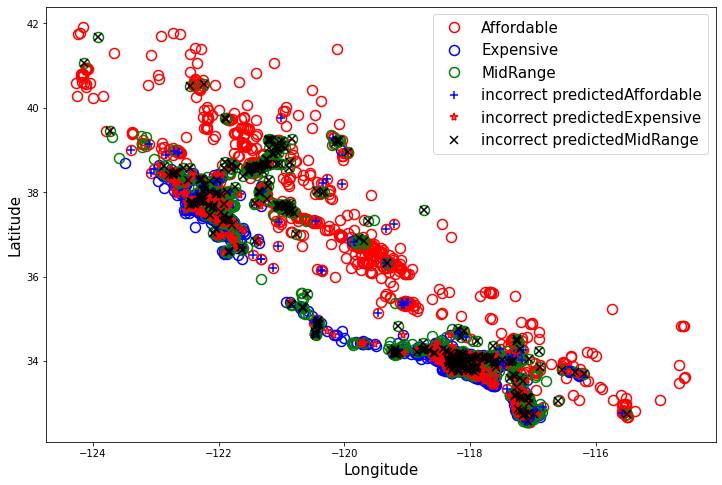

In [35]:
colors = ['r','b','g']
markers = ['s','x','o']

colors_test = ['b','r','k']
markers_test = ['+','*','x']
plt.figure(figsize=(12,8))
for l,c,m in zip(np.unique(y_test),colors,markers):
    plt.plot(scaler.inverse_transform(Test_df)[y_test==l,7],scaler.inverse_transform(Test_df)[y_test==l,6],
            linestyle = 'None',marker='o',markeredgewidth=1.5,markersize=10,markerfacecolor='None',
            color=c, label=l)
    
for l,c,m in zip(np.unique(y_pred),colors_test,markers_test):
    plt.plot(scaler.inverse_transform(Test_df)[~(y_mlp_pred==l) & (y_test==l),7],
            scaler.inverse_transform(Test_df)[~(y_mlp_pred==l) & (y_test==l),6],linestyle='None',marker=m,markeredgewidth=1.5,
            markersize=8,markerfacecolor='None',color=c, label='incorrect predicted'+l)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude',fontsize=15)
plt.legend(fontsize=15)
plt.show

In [36]:
sum((~(y_mlp_pred==l)&(y_test==l)))

372

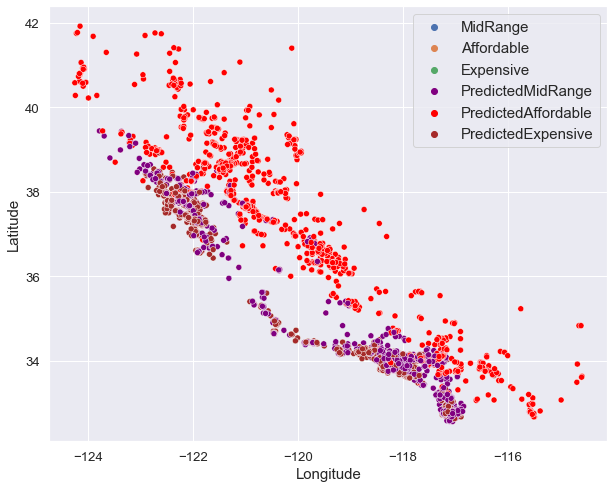

In [37]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.scatterplot(x=scaler.inverse_transform(Test_df)[:,7],y=scaler.inverse_transform(Test_df)[:,6], hue=y_test)
sns.scatterplot(x=scaler.inverse_transform(Test_df)[:,7],y=scaler.inverse_transform(Test_df)[:,6], hue=['Predicted'+ s for s in y_pred],palette=['purple','red','brown'])
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.legend(fontsize=15)

[[1115   13  267]
 [  32  779  548]
 [ 285   87 1002]]


<function matplotlib.pyplot.show(close=None, block=None)>

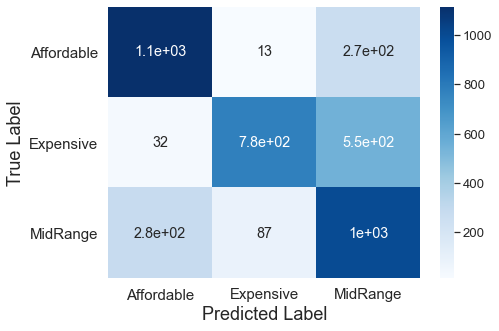

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

cm= confusion_matrix(y_test,y_mlp_pred,labels=np.unique(df5.iloc[:,9]))
print(cm)

plt.subplots(figsize=(7,5))
res=sns.heatmap(cm,annot=True,cmap=plt.cm.Blues,xticklabels=np.unique(df5.iloc[:,9]),yticklabels=np.unique(df5.iloc[:,9]))
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=15, rotation=0)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=15, rotation=0)
res.set_ylabel('True Label',fontsize=18)
res.set_xlabel('Predicted Label', fontsize=18)
plt.show

In [39]:
#classifiaction report
print(classification_report(y_test,y_mlp_pred, labels=np.unique(df5.iloc[:,9])))

              precision    recall  f1-score   support

  Affordable       0.78      0.80      0.79      1395
   Expensive       0.89      0.57      0.70      1359
    MidRange       0.55      0.73      0.63      1374

    accuracy                           0.70      4128
   macro avg       0.74      0.70      0.70      4128
weighted avg       0.74      0.70      0.70      4128



In [56]:
print('The Affordable class in MLP classifier results 3% lower accuracy than in LDA classifier')
print('However when we compare the prediction accuracy between LDA and MLP classifier , \nMLP classifier provides better accuracy than LDA')
print('**************************************************************')

The Affordable class in MLP classifier results 3% lower accuracy than in LDA classifier
However when we compare the prediction accuracy between LDA and MLP classifier , 
MLP classifier provides better accuracy than LDA
**************************************************************
